In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy

Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [3]:
df = pd.read_csv('lemonade.csv')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
Date           365 non-null object
Day            365 non-null object
Temperature    365 non-null float64
Rainfall       365 non-null float64
Flyers         365 non-null int64
Price          365 non-null float64
Sales          365 non-null int64
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [7]:
df.head(4)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17


In [24]:
df.Price = df.Price.astype(float)

In [25]:
df1 = df.copy()

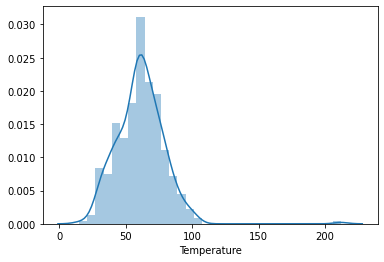

In [26]:
sns.distplot(df.Temperature)

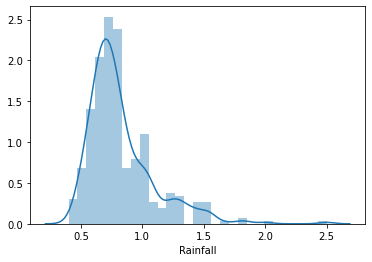

In [27]:
 sns.distplot(df.Rainfall)

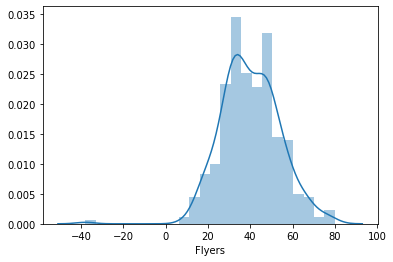

In [28]:
 sns.distplot(df.Flyers)

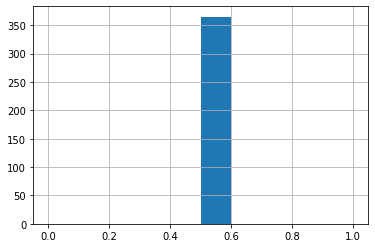

In [31]:
df.Price.hist()

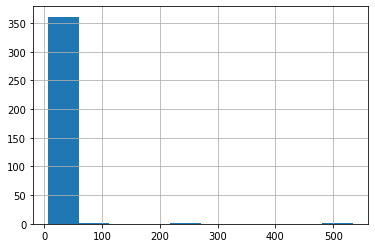

In [33]:
df.Sales.hist()

In [35]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

In [36]:
iqr = q3-q1
iqr

Temperature    22.00
Rainfall        0.26
Flyers         18.00
Price           0.00
Sales          10.00
dtype: float64

In [37]:
lowerbound = q1-iqr

In [38]:
lowerbound

Temperature    27.70
Rainfall        0.39
Flyers         13.00
Price           0.50
Sales          10.00
dtype: float64

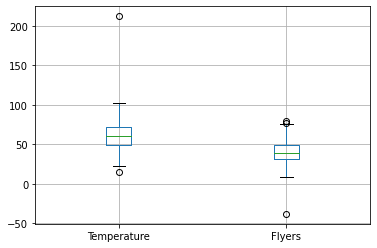

In [45]:
df.boxplot(column = ['Temperature', 'Flyers'])

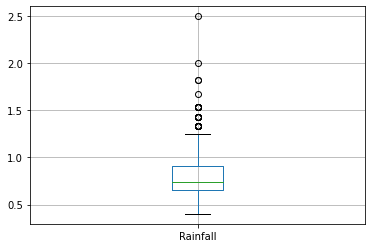

In [46]:
df.boxplot(column = ['Rainfall'])

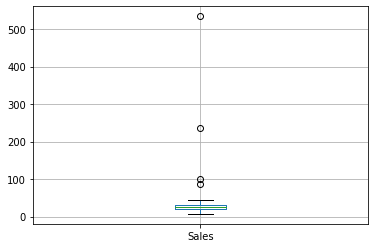

In [47]:
df.boxplot(column = ['Sales'])

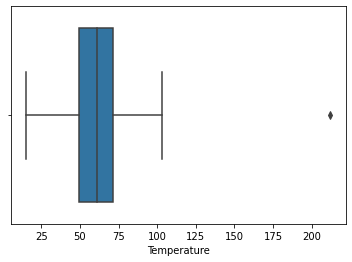

In [54]:
sns.boxplot(x=df["Temperature"], whis = 3)


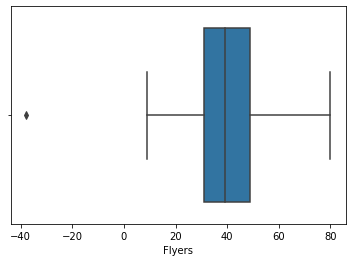

In [55]:
sns.boxplot(x=df["Flyers"], whis = 3)

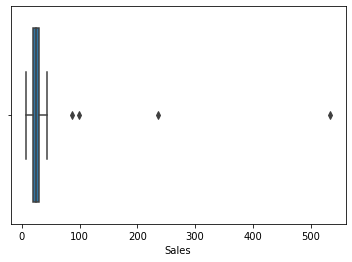

In [56]:
sns.boxplot(x=df["Sales"], whis = 3)

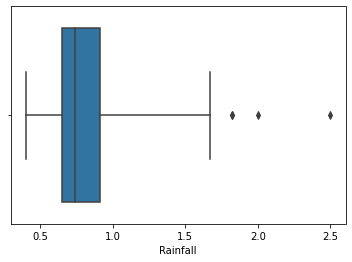

In [57]:
sns.boxplot(x=df["Rainfall"], whis = 3)

In [95]:
x = df.Temperature
zscores = pd.Series((x - x.mean()) / x.std())

In [96]:
zscores

0     -1.892340
1     -1.787286
2     -1.477652
3     -0.946852
4     -1.040848
         ...   
360   -1.024260
361   -1.295189
362   -1.201194
363   -1.676702
364   -2.550311
Name: Temperature, Length: 365, dtype: float64

In [97]:
x[abs(zscores) > 2]

41     212.0
166     99.3
176    102.6
181    102.9
190     98.0
198     99.3
202     99.6
207     97.9
338     22.0
364     15.1
Name: Temperature, dtype: float64

In [98]:
x[abs(zscores) > 3]

41    212.0
Name: Temperature, dtype: float64

In [99]:
x = df.Rainfall
zscores = pd.Series((x - x.mean()) / x.std())

In [100]:
x[abs(zscores) > 2]

0      2.00
5      1.54
6      1.54
10     1.54
15     1.67
16     1.43
19     1.43
23     1.54
337    1.54
338    1.82
342    1.43
343    1.82
346    1.43
347    1.54
351    1.43
355    1.54
359    1.43
363    1.43
364    2.50
Name: Rainfall, dtype: float64

In [101]:
x[abs(zscores) > 3]

0      2.00
15     1.67
338    1.82
343    1.82
364    2.50
Name: Rainfall, dtype: float64

In [102]:
x = df.Flyers
zscores = pd.Series((x - x.mean()) / x.std())

In [109]:
x[abs(zscores) > 2]

166    77
170    70
171    76
182    68
183    68
194    80
198    76
203    72
204    69
207    74
324   -38
338    11
364     9
Name: Flyers, dtype: int64

In [107]:
x[abs(zscores) > 3]

324   -38
Name: Flyers, dtype: int64